# PWM demonstration

In [1]:
%matplotlib inline

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


A PWM signal is a periodic signal of rectangular pulses. The duty cycle describes the percentage of the signal that the signal is high within a period. The following cell executes an interactive plot, where you can change the duty cycle of a PWM signal from 0 to 1. Just drag the slider and observe the changes.

In [3]:
from ipywidgets import interact

@interact(width=(0,1,0.01))
def pwm(width=0.5):
    t = linspace(0,5,1000)
    y = 1.0*(t % 1 < width)
    plot(t,y)

interactive(children=(FloatSlider(value=0.5, description='width', max=1.0, step=0.01), Output()), _dom_classes…

A servo is a small device with a motor that holds a position. The control loop within the servo receives a PWM as input. Most servos are connected to GND (0V), +5V and a signal line. On that signal line they expect a PWM ranging from about 2% to 12% in duty cycle. This signal in turn is mapped to the angular position of the servo ranging from about 0° to 180°. The conversion is a linear function:

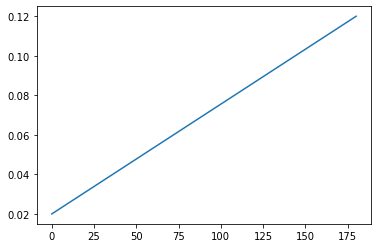

In [4]:
angle = linspace(0,180,1000)
duty = 0.10/180*angle + 0.02
plot(angle,duty)

The conversion function can be adjusted to the individual servo. E.g., some servos do require a duty cycle from 3% to 13%. Let $\text{duty}_\text{max}$ and $\text{duty}_\text{min}$ be the maximum and minimum duty cycle, then the general formula which maps the angle $\alpha$ in degrees to the corresponding duty cycle is given by:

$$f(\alpha) = \frac{\text{duty}_\text{max}-\text{duty}_\text{min}}{180°}\cdot \alpha + \text{duty}_\text{min}$$

Given this formula you can interactively change the values of $\text{duty}_\text{max}$, $\text{duty}_\text{min}$ and $\alpha$ in the next plot and observe the corresponding result:

In [5]:
from IPython.display import SVG, display

@interact(duty_max=(0.08,0.14,0.005), duty_min=(0.01,0.04,0.005), alpha=(0,180,1))
def servo_pwm(duty_max=0.12, duty_min=0.02, alpha=90):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the mapping function
    alpha_range=linspace(0,180,180)
    y_alpha=(duty_max-duty_min)/180*alpha_range + duty_min
    duty = (duty_max-duty_min)/180*alpha + duty_min
    axs[0].plot(alpha_range, y_alpha)
    axs[0].plot(alpha, duty, 'ro')
    
    # Plot the corresponding PWM signal with the appropriate duty cycle
    t = linspace(0,5,1000)
    y = 1.0*(t % 1 < duty)

    axs[1].plot(t,y)
    
    return SVG("""<svg width="200" height="200">
  <rect x="70" y="20" width="60" height="150" style="fill:blue;fill-opacity:1" />
  <circle cx="100" cy="120" r="29" stroke="black" stroke-width="1" fill="blue" /> 
  <ellipse cx="75" cy="120" rx="40" ry="15" style="fill:white;stroke:black;stroke-width:1" transform="rotate({} 100 120)" />
  <circle cx="100" cy="120" r="2" stroke="black" stroke-width="1" fill="black" /> 
</svg>""".format(alpha))

interactive(children=(FloatSlider(value=0.12, description='duty_max', max=0.14, min=0.08, step=0.005), FloatSl…